## 1.. Read data using sqlite3 !

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3

In [4]:
con=sqlite3.connect(r'D:\Data Analyst Project\Geospatial Analysis Project( Zomato Case-Study)\zomato_rawdata.sqlite')
# create a SQL connection to our SQLite database..

In [5]:
pd.read_sql_query("SELECT * FROM Users" , con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [6]:
df = pd.read_sql_query("SELECT * FROM Users" , con)

In [7]:
df.shape

(51717, 18)

In [8]:
 df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## 2.. how to deal with missing values ? 

    we should not drop missing value right now as we might loose important info..

In [9]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [ ]:
'''As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column We will keep that column for now..
let's check for rate column as it contains 15% of its points as null value..        
'''

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

1. So, Now we found this column has 'NEW' ,"-" values which should replaced by zero or np.nan..
2. there are values as '3.8/5' instead of 3.8 , ie we have to fix this .. 

In [12]:
df['rate'].replace(('NEW','-'),np.nan,inplace=True)
## np.nan is a way to denote my missing feature

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
float('4.1/5'.split('/')[0])

4.1

In [15]:
df['rate']=df['rate'].apply(lambda x:float(x.split('/')[0]) if type(x)==str else x)
## update the float type values in rate feature 

In [16]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

## 3. Is there a relation between online order option and rating of the restaurant ?

In [1]:
### lets find out relation b/w rating & online_order
### how many restaurants that have rating 0 , 1 , 1.2 , 1.4 , 1.6,... & that accepts online_order & do not accept order
### create frequency tables..

In [17]:
x=pd.crosstab(df['rate'],df['online_order'])

In [18]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

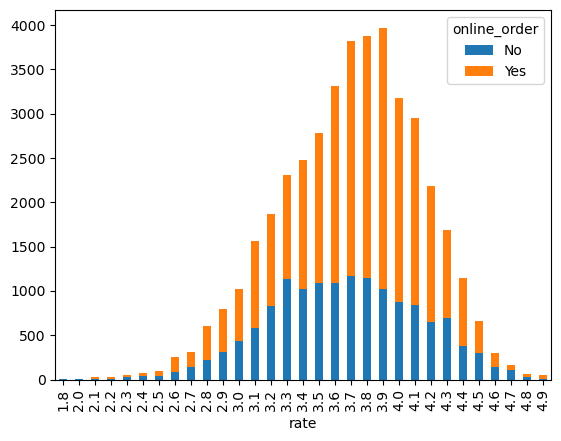

In [18]:
x.plot(kind='bar',stacked=True)
## stacked=True gives basically stacked bar chart

In [19]:
x.sum(axis=1).astype(float)
## axis=1 means summation across rows, as by-default it is axis is 0

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [20]:
##(x/x+y)*100=%
## div() is a inbuilt function of a pandas designed for a data

In [20]:
normalize_df=x.div(x.sum(axis=1).astype(float),axis=0)

<Axes: xlabel='rate'>

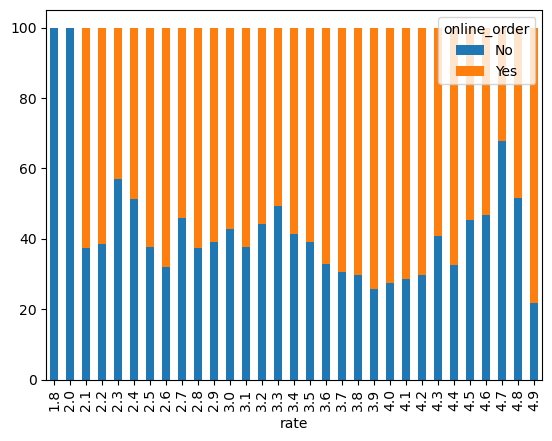

In [21]:
(normalize_df*100).plot(kind='bar',stacked=True)
## lets multiply each value by 100 so that we will get much better results in % !
## stacked=True gives basically stacked bar chart

In [23]:
## restaurants accept online orders have more number of ratings compare to reataurant that doesn't accept online orders

## 4.. Data Cleaning to perform Text Analysis 
    Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

In [22]:
df['rest_type'].isnull().sum()

227

In [23]:
data = df.dropna(subset=['rest_type'])

In [24]:
data['rest_type'].isnull().sum()

0

In [25]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [ ]:
### extracting data of 'Quick Bites' only ..

In [26]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [27]:
quick_bites_df.shape

(20639, 18)

In [28]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

        How to Perform Data Pre-processing to pre-process this data..
        Steps-->>
            a) Perform Lower-case operation
            b) Do tokenization
            c) Removal of stopwords from data
            d) Store your entire data in the list so that we can commpute frequency of each word
            e) Do plotting , using Unigram  , bigram & Trigram analysis..

In [ ]:
## a) Perform Lower-case operation

In [29]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [30]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())
# Converting all the text to lowercase

C:\Users\karan\AppData\Local\Temp\ipykernel_13512\3170989598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [ ]:
## b) Do tokenization

In [31]:
from nltk.corpus import RegexpTokenizer

In [32]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")
##  Creating a regular expression tokenizer that have only alphabets 
# This will return separate words (tokens) from the text in the form of list

In [33]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [34]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])
## tokenize data of third review

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [35]:
reviews_tokens=data['reviews_list'].apply(tokenizer.tokenize)

In [36]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
51712    [Rated, RATED, n, Food, and, service, are, inc...
51713                                                   []
51714                                                   []
51715    [Rated, RATED, n, Nice, and, friendly, place, ...
51716    [Rated, RATED, n, Great, ambience, looking, ni...
Name: reviews_list, Length: 51490, dtype: object

## 5.. Performing Unigram analysis & removal of stopwords ..

In [ ]:
## c) Removal of stopwords from data

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [38]:
from nltk.corpus import stopwords

In [39]:
stop = stopwords.words('english')
# These are common words that typically don't add meaning to the text and can be removed

In [40]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])
# Adding custom words to stopwords

In [42]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
reviews_tokens
### remove stopwords

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
51712    [Rated, RATED, n, Food, and, service, are, inc...
51713                                                   []
51714                                                   []
51715    [Rated, RATED, n, Nice, and, friendly, place, ...
51716    [Rated, RATED, n, Great, ambience, looking, ni...
Name: reviews_list, Length: 51490, dtype: object

In [44]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [45]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [46]:
## remove stopwords from "reviews_tokens" Series ..
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [47]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
51712    [Food, service, incomparably, excellent, The, ...
51713                                                   []
51714                                                   []
51715    [Nice, friendly, place, staff, awesome, Ansur,...
51716    [Great, ambience, looking, nice, good, selecti...
Name: reviews_list, Length: 51490, dtype: object

In [ ]:
## d) Store your entire data in the list so that we can compute frequency of each word

In [48]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [49]:
total_reviews_2D = list(reviews_tokens_clean)

In [50]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [51]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [ ]:
## e) Do plotting
    1..Unigram analysis
    2..Bigram Analysis
    3..Trigram analysis

In [52]:
from nltk import FreqDist

In [53]:
fd = FreqDist()

In [54]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [55]:
fd.most_common(20)
# Examining the top 20 most frequent words

[('place', 958892),
 ('I', 906624),
 ('good', 870711),
 ('food', 800115),
 ('The', 667679),
 ('chicken', 313719),
 ('service', 273865),
 ('ordered', 261388),
 ('taste', 245081),
 ('great', 235933),
 ('really', 234390),
 ('try', 218724),
 ('ambience', 217874),
 ('time', 217257),
 ('one', 213594),
 ('It', 206382),
 ('also', 202443),
 ('like', 197463),
 ('We', 184449),
 ('visit', 183865)]

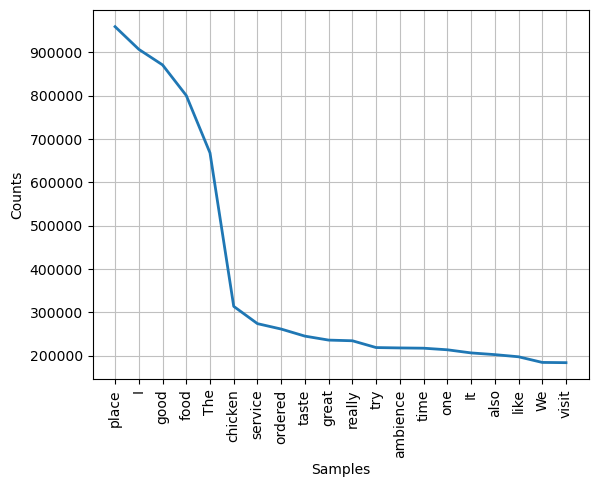

<Axes: xlabel='Samples', ylabel='Counts'>

In [56]:
fd.plot(20)
# Plotting the top 20 most frequent words

In [ ]:
'''
Of the 20 most frequent words across customer reviews place, food , good , chicken ,taste ,service ,biryani
'''

## 6.. Performing Bi-gram & Trigram analysis on data

In [57]:
from nltk import FreqDist , bigrams , trigrams

In [58]:
bi_grams = bigrams(total_reviews_1D)
# Generating bigrams from the reviews

In [59]:
bi_grams

<generator object bigrams at 0x0000023C2F740120>

In [60]:
fd_bigrams = FreqDist()
for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1
    # Getting the bigram frequency distribution

In [61]:
fd_bigrams.most_common(20)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983)]

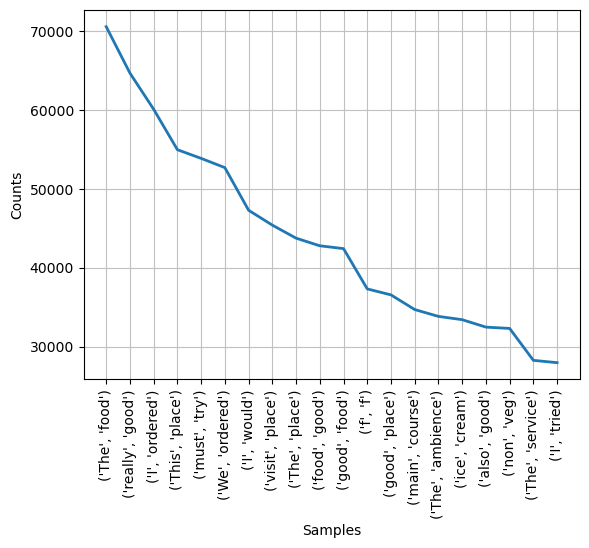

<Axes: xlabel='Samples', ylabel='Counts'>

In [62]:
fd_bigrams.plot(20)
# Plotting the top 20 most frequent bigrams

In [63]:
fd_bigrams.most_common(100)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983),
 (('place', 'I'), 27535),
 (('good', 'The'), 26699),
 (('good', 'I'), 25415),
 (('food', 'I'), 25194),
 (('one', 'best'), 24631),
 (('nWe', 'ordered'), 24599),
 (('The', 'staff'), 23847),
 (('nice', 'place'), 23528),
 (('must', 'visit'), 23491),
 (('I', 'love'), 22794),
 (('time', 'I'), 21754),
 (('place', 'good'), 21720),
 (('I', 'loved'), 21398),
 (('place', 'hangout'), 21305),
 (('pretty', 'good'), 21033),
 (('I', 'like'), 20502),
 (

Food items/preferences mentioned in the top 50 bigrams are:
Fried Rice , Ice cream , non-veg , chicken biryani , main course
 
Factors contributing to restaurant experience are : 
good food > pocket friendly > good place > good place > value (for) money  > Home delivery..

In [64]:
tri_grams = trigrams(total_reviews_1D)

In [65]:
fd_trigrams = FreqDist()
for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1
# Generating trigrams from the reviews    

In [66]:
fd_trigrams.most_common(50)

[(('f', 'f', 'f'), 19127),
 (('veg', 'non', 'veg'), 9254),
 (('The', 'food', 'good'), 9236),
 (('must', 'visit', 'place'), 9137),
 (('place', 'hangout', 'friends'), 8869),
 (('f', 'c', 'f'), 8001),
 (('xa', 'xa', 'xa'), 7959),
 (('I', 'must', 'say'), 7657),
 (('I', 'visited', 'place'), 7594),
 (('I', 'would', 'recommend'), 6478),
 (('nFood', 'nAmbience', 'nService'), 6236),
 (('I', 'would', 'say'), 5719),
 (('food', 'really', 'good'), 5624),
 (('A', 'good', 'place'), 5454),
 (('A', 'must', 'visit'), 5385),
 (('place', 'hang', 'friends'), 5366),
 (('c', 'f', 'f'), 4784),
 (('The', 'ambience', 'good'), 4665),
 (('North', 'Indian', 'food'), 4597),
 (('nFood', 'nService', 'nAmbience'), 4521),
 (('A', 'must', 'try'), 4381),
 (('f', 'f', 'c'), 4224),
 (('The', 'food', 'really'), 4125),
 (('I', 'would', 'like'), 4092),
 (('first', 'time', 'I'), 3965),
 (('I', 'would', 'definitely'), 3925),
 (('really', 'good', 'The'), 3862),
 (('The', 'service', 'good'), 3778),
 (('nService', 'nValue', 'money

The specific food preferences we can see here are north Indian Food , paneer butter masala, South Indian food & chicken fried rice...
Bangalore is full of chicken lovers...

## 7.. Extract geographical-coordinates from data ..

 where are most of the North-Indian restaurants situated in Bengaluru ? 

In [67]:
!pip install geocoder
!pip install geopy

In [68]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [69]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [70]:
len(df['location'].unique())

94

In [71]:
df['location'] = df['location'] + " , Bangalore  , Karnataka , India "
# Lets add 'Bangalore , Karnataka , India' so that u will get more more accurate geographical co-ordinates..

In [72]:
df['location']

0           Banashankari , Bangalore  , Karnataka , India 
1           Banashankari , Bangalore  , Karnataka , India 
2           Banashankari , Bangalore  , Karnataka , India 
3           Banashankari , Bangalore  , Karnataka , India 
4           Basavanagudi , Bangalore  , Karnataka , India 
                               ...                        
51712         Whitefield , Bangalore  , Karnataka , India 
51713         Whitefield , Bangalore  , Karnataka , India 
51714         Whitefield , Bangalore  , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore  , Karn...
51716    ITPL Main Road, Whitefield , Bangalore  , Karn...
Name: location, Length: 51717, dtype: object

In [73]:
df['location'].unique()

array(['Banashankari , Bangalore  , Karnataka , India ',
       'Basavanagudi , Bangalore  , Karnataka , India ',
       'Mysore Road , Bangalore  , Karnataka , India ',
       'Jayanagar , Bangalore  , Karnataka , India ',
       'Kumaraswamy Layout , Bangalore  , Karnataka , India ',
       'Rajarajeshwari Nagar , Bangalore  , Karnataka , India ',
       'Vijay Nagar , Bangalore  , Karnataka , India ',
       'Uttarahalli , Bangalore  , Karnataka , India ',
       'JP Nagar , Bangalore  , Karnataka , India ',
       'South Bangalore , Bangalore  , Karnataka , India ',
       'City Market , Bangalore  , Karnataka , India ',
       'Nagarbhavi , Bangalore  , Karnataka , India ',
       'Bannerghatta Road , Bangalore  , Karnataka , India ',
       'BTM , Bangalore  , Karnataka , India ',
       'Kanakapura Road , Bangalore  , Karnataka , India ',
       'Bommanahalli , Bangalore  , Karnataka , India ', nan,
       'CV Raman Nagar , Bangalore  , Karnataka , India ',
       'Electronic Ci

In [74]:
df_copy = df.copy()

In [75]:
df_copy['location'].isnull().sum()

21

In [76]:
df_copy = df_copy.dropna(subset=['location'])

In [77]:
df_copy['location'].isnull().sum()

0

In [78]:
locations = pd.DataFrame(df_copy['location'].unique())

In [79]:
locations.columns = ['name']

In [80]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [87]:
from geopy.geocoders import Nominatim

In [88]:
geolocator = Nominatim(user_agent="app" , timeout=None)
# assign timeout=None in order to get rid of timeout error..

In [90]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [91]:
locations['latitude'] = lat
locations['longitude'] = lon

In [92]:
locations
# We have found out latitude and longitude of each location using geopy

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


## 8.. Lets build geographical Heat-Maps 

In [93]:
### lets figure it out whether we have misssing values or not !
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [94]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [95]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [96]:
locations['latitude'][45] = 12.9764122
locations['longitude'][45] = 77.6017437

In [97]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [98]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [99]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [100]:
df['cuisines'].isnull().sum()

45

In [101]:
df = df.dropna(subset=['cuisines'])

In [102]:
north_india = df[df['cuisines'].str.contains('North Indian')]
### lets find it out what are those areas where we have most number of North-Indian restaurants ?

In [103]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [104]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})

In [105]:
north_india_rest_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , I...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [106]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [107]:
heatmap_df = north_india_rest_count.merge(locations , on='name' , how='left')
### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..

In [108]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.915149,77.585702
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , I...",2,12.974689,77.531030
88,"West Bangalore , Bangalore , Karnataka , India",1,13.022235,77.567183


In [109]:
import folium

In [110]:
!pip install folium

In [111]:
basemap = folium.Map()

In [112]:
basemap

In [113]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [114]:
from folium.plugins import HeatMap

In [115]:
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)

In [116]:
basemap

### conclusions(Inferences)
    1..It is clear that restaurants tend to concentrate in central bangalore area.
    2..The clutter of restaurants lowers are we move away from central.
    3..So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
    4..note heatmap is good when we have latitude,longitude or importance of that particular place or count of that place

## 9.. How to automate your task : ie Perform Automation ..

In [ ]:
## lets automate all these for north indian  , south Indian & chinese...

In [117]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap


In [118]:
get_heatmap('South Indian')

                                          name  count   latitude  longitude
0        BTM , Bangalore  , Karnataka , India     815  12.911276  77.604565
1   JP Nagar , Bangalore  , Karnataka , India     437  12.915149  77.585702
2        HSR , Bangalore  , Karnataka , India     436  12.911623  77.638862
3  Jayanagar , Bangalore  , Karnataka , India     416  12.929273  77.582423


In [119]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)